<a href="https://colab.research.google.com/github/Pritam-lnmiit/lifesensor/blob/main/CarPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'Car_price_prediction'...


In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [172]:
df=pd.read_csv('/Car details.csv')

In [173]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [174]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [175]:
df.shape

(8128, 13)

In [176]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [178]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [179]:
df.duplicated().sum()

1202

In [180]:
df.drop_duplicates(inplace=True)

In [181]:
df.dropna(how='any',inplace=True)

In [182]:
df.shape

(6717, 13)

In [183]:
import re

In [184]:
res='190Nm@ 2000rpm'.replace("."," ")
res='190Nm@ 2000rpm'.replace(","," ")
a=[int(s) for s in re.findall(r'\d+', res)]
a

[190, 2000]

In [185]:
torque_list=df['torque'].to_list()

In [186]:
torque_list

['190Nm@ 2000rpm',
 '250Nm@ 1500-2500rpm',
 '12.7@ 2,700(kgm@ rpm)',
 '22.4 kgm at 1750-2750rpm',
 '11.5@ 4,500(kgm@ rpm)',
 '113.75nm@ 4000rpm',
 '7.8@ 4,500(kgm@ rpm)',
 '59Nm@ 2500rpm',
 '170Nm@ 1800-2400rpm',
 '160Nm@ 2000rpm',
 '248Nm@ 2250rpm',
 '78Nm@ 4500rpm',
 '190Nm@ 2000rpm',
 '84Nm@ 3500rpm',
 '115Nm@ 3500-3600rpm',
 '200Nm@ 1750rpm',
 '22.4 kgm at 1750-2750rpm',
 '62Nm@ 3000rpm',
 '219.7Nm@ 1500-2750rpm',
 '160Nm@ 2000rpm',
 '200Nm@ 1750rpm',
 '190Nm@ 2000rpm',
 '200Nm@ 1750rpm',
 '114Nm@ 3500rpm',
 '115Nm@ 4000rpm',
 '69Nm@ 3500rpm',
 '172.5Nm@ 1750rpm',
 '84Nm@ 3500rpm',
 '59Nm@ 2500rpm',
 '200Nm@ 1750rpm',
 '6.1kgm@ 3000rpm',
 '114.7Nm@ 4000rpm',
 '200Nm@ 1750rpm',
 '60Nm@ 3500rpm',
 '90Nm@ 3500rpm',
 '151Nm@ 4850rpm',
 '104Nm@ 4000rpm',
 '320Nm@ 1700-2700rpm',
 '59Nm@ 2500rpm',
 '250Nm@ 1750-2500rpm',
 '145Nm@ 4600rpm',
 '146Nm@ 4800rpm',
 '115Nm@ 4000rpm',
 '200Nm@ 1750rpm',
 '90Nm@ 3500rpm',
 '343Nm@ 1400-3400rpm',
 '200Nm@ 1400-3400rpm',
 '200Nm@ 1250-4000rpm',
 '20

In [187]:
torque_rpm=[]
def extractingRPM(x):
  for i in x:
    res=i.replace("."," ")
    res=i.replace(","," ")

    temp=[int(s) for s in re.findall(r'\d+', res)]
    torque_rpm.append(max(temp))

In [188]:
extractingRPM(torque_list)

In [189]:
torque_rpm[:5]

[2000, 2500, 700, 2750, 500]

In [190]:
df['torque_rpm']=torque_rpm

In [191]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,500


In [192]:
mill_list=df['mileage'].to_list()
mill_km=[]

In [193]:
def extracting_mill(x):
  for item in x:
    temp=[]
    try:
      for s in item.split(" "):
        temp.append(float(s))

    except:
      pass

      mill_km.append(max(temp))

In [194]:
extracting_mill(mill_list)

In [195]:
mill_km[:5]

[23.4, 21.14, 17.7, 23.0, 16.1]

In [196]:
df['mill_km']=mill_km

In [197]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mill_km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,700,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,500,16.10


In [198]:
engine_list=df['engine'].to_list()
engine=[]

In [199]:
def extracting_engine(x):
  for item in x:
    temp=[]
    try:
      for s in item.split(" "):
        temp.append(float(s))

    except:
      pass

      engine.append(max(temp))

In [200]:
extracting_engine(engine_list)

In [201]:
engine[:5]

[1248.0, 1498.0, 1497.0, 1396.0, 1298.0]

In [202]:
df['engine']=engine

In [203]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mill_km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,700,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,500,16.10


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
 13  torque_rpm     6717 non-null   int64  
 14  mill_km        6717 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 839.6+ KB


In [205]:
power_list=df['max_power'].to_list()


In [206]:
power=[]

In [207]:
def extracting_power(x):
  for item in x:
    temp=[]
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass

      power.append(max(temp))

In [208]:
extracting_power(power_list)

In [209]:
power[:5]

[74.0, 103.52, 78.0, 90.0, 88.2]

In [210]:
df['power']=power

In [211]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mill_km,power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,700,17.70,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,500,16.10,88.20


In [212]:
df=df.drop(['torque','mileage','max_power'],axis=1)

In [213]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,torque_rpm,mill_km,power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,5.0,2000,23.40,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,5.0,2500,21.14,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,5.0,700,17.70,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,5.0,2750,23.00,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,5.0,500,16.10,88.20


In [214]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,torque_rpm,mill_km,power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,5.0,2000,23.40,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,5.0,2500,21.14,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,5.0,700,17.70,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,5.0,2750,23.00,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,5.0,500,16.10,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,998.0,5.0,3500,18.90,67.10
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,1396.0,5.0,2750,22.54,88.73
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,1197.0,5.0,4000,18.50,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493.0,5.0,900,16.80,110.00


In [215]:
df.describe()

,year,selling_price,km_driven,engine,seats,torque_rpm,mill_km,power
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,1430.985857,5.434271,2916.026649,19.466585,87.766100
std,3.897402,5.235504e+05,5.870328e+04,493.469198,0.983805,1040.211299,4.048102,31.724555
min,1994.000000,2.999900e+04,1.000000e+00,624.000000,2.000000,6.000000,0.000000,32.800000
25%,2011.000000,2.500000e+05,3.800000e+04,1197.000000,5.000000,2000.000000,16.800000,67.100000
50%,2014.000000,4.200000e+05,6.820300e+04,1248.000000,5.000000,2800.000000,19.440000,81.830000
75%,2017.000000,6.500000e+05,1.000000e+05,1498.000000,5.000000,4000.000000,22.500000,100.000000
max,2020.000000,1.000000e+07,2.360457e+06,3604.000000,14.000000,5300.000000,42.000000,400.000000


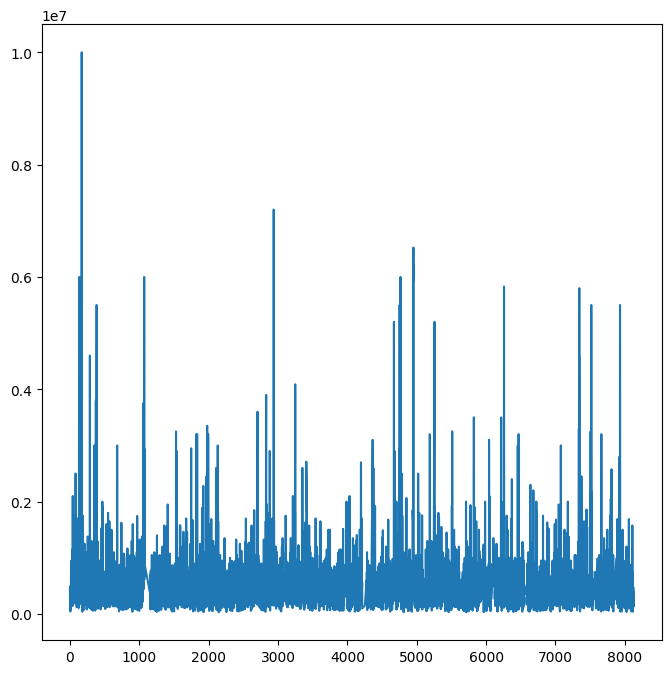

In [216]:
plt.figure(figsize=(8,8))
plt.plot(df['selling_price'])
plt.show()

In [217]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
catagorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [218]:
numerical_feature

['year',
 'selling_price',
 'km_driven',
 'engine',
 'seats',
 'torque_rpm',
 'mill_km',
 'power']

In [219]:
catagorical_feature

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [231]:
# Converting categorical data to integer format.

def ref1(x):
  if x == 'Manual':
    return 1
  else:
    return 0

df['transmission'] = df['transmission'].map(ref1)

df['transmission'][:5]

,transmission
0,0
1,0
2,0
3,0
4,0


In [226]:
def ref2(x):
  if x == 'Individual':
    return 1
  elif x == 'Dealer':
    return 0
  else:
    return -1

df['seller_type'] = df['seller_type'].map(ref2)

In [227]:
def ref3(x):
  if x == 'Petrol':
    return 1
  elif x == 'Diesel':
    return 0
  else:
    return -1

df['fuel'] = df['fuel'].map(ref3)

In [232]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,torque_rpm,mill_km,power
0,Maruti Swift Dzire VDI,2014,450000,145500,-1,-1,0,First Owner,1248.0,5.0,2000,23.40,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,-1,-1,0,Second Owner,1498.0,5.0,2500,21.14,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,-1,-1,0,Third Owner,1497.0,5.0,700,17.70,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,-1,-1,0,First Owner,1396.0,5.0,2750,23.00,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,-1,-1,0,First Owner,1298.0,5.0,500,16.10,88.20


In [233]:
owners=pd.get_dummies(df['owner'])

In [236]:
x=pd.concat([df,owners],axis=1)

In [237]:
x.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,torque_rpm,mill_km,power,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,-1,-1,0,First Owner,1248.0,5.0,2000,23.40,74.00,True,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,-1,-1,0,Second Owner,1498.0,5.0,2500,21.14,103.52,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,-1,-1,0,Third Owner,1497.0,5.0,700,17.70,78.00,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,-1,-1,0,First Owner,1396.0,5.0,2750,23.00,90.00,True,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,-1,-1,0,First Owner,1298.0,5.0,500,16.10,88.20,True,False,False,False,False


In [238]:
y=x['selling_price']
x=x.drop(['selling_price','owner','name'],axis=1)

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA



In [240]:
x_train,x_test,y_train,y_test=train_test_split(x[:3000],y[:3000],test_size=0.2)

In [241]:
random_model=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
random_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [242]:
y_pred=random_model.predict(x_test)

In [243]:
train_acc=round(random_model.score(x_train,y_train)*100,2)
test_acc=round(random_model.score(x_test,y_test)*100,2  )

In [246]:
print(f"train accuracy: {train_acc}%")
print(f"test accuracy: {test_acc}%")

train accuracy: 98.13%
test accuracy: 88.03%


In [248]:
# Save the trained model as a pickle string.
import pickle

saved_model = pickle.dump(random_model, open('/content/drive.pickle','wb'))